<a href="https://colab.research.google.com/github/fgprevito/building-intuition/blob/main/Introduction_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Further refining storytelling and data analysis

---

OBJECTIVE: Learn to think in a high quality way

To think in a high quality way = to be capable of reducing my understanding to a mathematical reasoning


---


In order to develop/demonstrate the ability to mathematically reason my understanding of the world, I'll analyze economic data scraped from the web.

What does that mean? I want to be able to derive meaning from the data points. Before I try digging into stories behind the data and making claims about what the data says, I must first question the fundamental assumptions I am making about this data.

Do I really understand this data? Can I reduce my understanding of the data to mathematical reasoning? In other words, can I programmatically generate the data in a way that simulates reality reasonably well, and I can easily test to make sure my assumptions holds up in various scenarios?

Well lets see


---

Economics data can be complicated and chaotic with many factors affecting the final numbers we see on an income statement. Instead of trying to comprehend all of it in its entirety, what I can try to do is to understand it as something linear, the simplest mathematic expression I can find to express my understanding of the world, so that I have some level of understanding on how different features relate to each other, and build up my mathematical model from there. In other words I can deduce the model parameters that explain to me how different features relate to each other. But what are the implications of a linear relationship? What does that even mean? That's what I'll attempt to explore here


---

Ultimately I want to predict some kind of financial output (stock price, net income, etc) using some categorical inputs, starting with these 3:

1: Company

2: Year

3: Sector



---

In [ ]:
import numpy
from matplotlib import pyplot

In [ ]:
NOISE = 1
START_YEAR = 2017
NUM_YEARS = 5

In [ ]:
company = ['Apple', 'Microsoft', 'Exxon', 'Shell']
co_map = {x:ii for (ii,x) in enumerate(company)}
co_map

{'Apple': 0, 'Microsoft': 1, 'Exxon': 2, 'Shell': 3}



---

I have my input variable now. Now I want to understand the linear relationship it has with my output. How does it affect my output, for it to be linearly correlated with my input?

In order to answer this question I'm going to meticulously control the creation of this experiment and test it at various points by changing its parts to see how that affects my experiment, and how different features relate to each other.

To start this process off, I'm going to build a design matrix, which can explain the output in terms of the inputs. The design matrix will describe the 'design' of this experiment.

---



In [ ]:
acc = []

for yy in range(START_YEAR, START_YEAR + NUM_YEARS):
  for c in company:
    new_row = numpy.zeros(len(company), )
    new_row[co_map[c]] = 1
    acc.append(new_row)

design_matrix = numpy.vstack(acc)
design_matrix

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
design_matrix.shape

(20, 4)



---

This next piece, 'actual weights' is going to simulate the true relationship company has with its stock price. AKA, how much each caompny affects the stock price

This is the relationship I am trying to find in my data using a linear regression

In reality, its probably impossible for me to actually know what this number is for a fact. This is here so I can test things like: how changing my formulas and variables affect how I view reality. How do events that tank my stock price change how my linear model's effectiveness? How close can I get to this number with the tools available in a linear regression? What stops me from being able to uncover this reality?

---



In [ ]:
actual_weights = numpy.random.rand(design_matrix.shape[1])
actual_weights

array([0.03906008, 0.69087053, 0.64625382, 0.7560039 ])



---

These next 2 code blocks will generate what represents the response variable, in this cas: 'stock price'. These are the observation I will use to help train my linear model so that I can recover the true relationship company has with stock price.

These would be like the historical stock price data I use to train my model

---



In [ ]:
outcomes = numpy.dot(design_matrix, actual_weights)
outcomes

array([0.03906008, 0.69087053, 0.64625382, 0.7560039 , 0.03906008,
       0.69087053, 0.64625382, 0.7560039 , 0.03906008, 0.69087053,
       0.64625382, 0.7560039 , 0.03906008, 0.69087053, 0.64625382,
       0.7560039 , 0.03906008, 0.69087053, 0.64625382, 0.7560039 ])

In [ ]:
outcomes += (numpy.random.rand(outcomes.shape[0]) - .5) * NOISE
outcomes

array([ 0.53620936,  0.71342152,  0.76445047,  0.95397355,  0.3629059 ,
        0.74340826,  0.49254478,  0.44116059,  0.0160644 ,  0.48269814,
        0.20764323,  0.30573503, -0.24154828,  0.47845367,  1.07787716,
        0.71906423,  0.10479741,  0.4813004 ,  0.33630749,  0.4233091 ])



---

Ordinary Least Squares

Now I am going to try and find the best possible value for my regression weights by finding the weights that create a line that most reduces the error between my regression equation and each outcome observation.

This next section of code blocks simulates me using the data I know, which are the stock prices + the names of the companies those prices belong to, in order to predict what the relationship between the 2 could be with the least amount of error possible.

Each of these code blocks help visualize the calculations that are being made to
 find this point

---



In [ ]:
# Covariance Matrix

numpy.dot(design_matrix.T, design_matrix)

array([[5., 0., 0., 0.],
       [0., 5., 0., 0.],
       [0., 0., 5., 0.],
       [0., 0., 0., 5.]])



---


Notice, for my covariance matrix the value of the diagonals tend to essentially be summing the number of observations for that column


---



In [ ]:
# Precision Matrix

numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix))

array([[0.2, 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0.2]])



---

Values for the precision matrix's diagonals are just the inverse of covariance

---



In [ ]:
# Hat Matrix

numpy.dot(numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix)), design_matrix.T)

array([[0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.2,
        0. , 0. , 0. , 0.2, 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0. ,
        0.2, 0. , 0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0. ,
        0. , 0.2, 0. , 0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0. ,
        0. , 0. , 0.2, 0. , 0. , 0. , 0.2]])



---

Takes the inverse and multiplies it by the transpose of the original design matrix

---



In [ ]:
# OLS

pred_weights = numpy.dot(numpy.dot(numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix)), design_matrix.T), outcomes)
pred_weights

array([0.15568576, 0.5798564 , 0.57576462, 0.5686485 ])



---

With no noise, the predicted outcomes will match exactly with the weights for each input observation. This is because the equation right now is effectively y = m(1) + 0, with m being the regression weight

---



In [ ]:
pred_outcomes = numpy.dot(design_matrix, pred_weights)
pred_outcomes

array([0.15568576, 0.5798564 , 0.57576462, 0.5686485 , 0.15568576,
       0.5798564 , 0.57576462, 0.5686485 , 0.15568576, 0.5798564 ,
       0.57576462, 0.5686485 , 0.15568576, 0.5798564 , 0.57576462,
       0.5686485 , 0.15568576, 0.5798564 , 0.57576462, 0.5686485 ])

Text(0, 0.5, 'Predicted Weights')

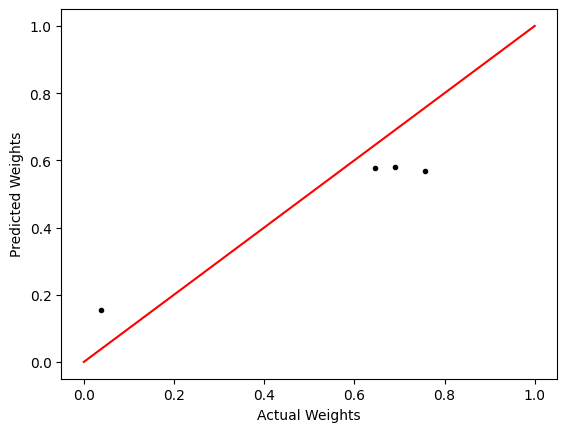

In [ ]:
pyplot.plot([0,1], [0,1], 'r-')
pyplot.plot(actual_weights, pred_weights, 'k.')

pyplot.xlabel('Actual Weights')
pyplot.ylabel('Predicted Weights')

Text(0, 0.5, 'Pred Outcomes')

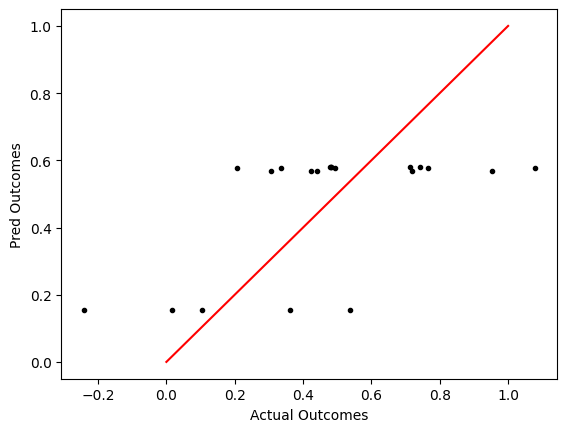

In [ ]:
pyplot.plot([0,1], [0,1], 'r-')
pyplot.plot(outcomes, pred_outcomes, 'k.')

pyplot.xlabel('Actual Outcomes')
pyplot.ylabel('Pred Outcomes')



---

Reflect and Evaluate

I've generated some data, attempted to calculate the parameters and predict future outputs, how do I evaluate my attempts? What are some measurements I can take in order to better understand what I can improve or change?

That's the purpose of this last section

---

MSE tells me on average how much my predicted outcomes deviated from the actual outcomes, aka how good of a predictor my model is. In reality it's dangerous for my MSE to be too small bc it is likely I would be overfitting to my training data


---



In [ ]:
# MSE

numpy.mean((pred_outcomes - outcomes)**2)

0.060336992879310415



---

How much is the average error on unit per unit basis? How well did my model recover the real relationship?

AKA I'm testing how close I was to calculating the true regression weights (the true relationship the company has with the financial output).


---




In [ ]:
# ME

numpy.mean(actual_weights - pred_weights)

0.06305826227211399

In [ ]:
# Variance

numpy.var(actual_weights - pred_weights)

0.01252276970923821

In [ ]:
# Standard Deviation

numpy.std(actual_weights - pred_weights)

0.1119051817801044

In a way, what I was able to do here was to decompose my understanding of the error in the relationship between company and stock price into 2 components:

- Approximation Bias: Difference between the expected value and true value of a parameter

- Variance: How sensitive the model is to new data points

Bias isn't super important for linear regression since the model instrinsically has high bias and low variance. Once the relationships between inputs and outputs gets more complicated, and less linear, then the question of whether we want to focus on reducing bias or varianc ebecomes more important


---

Observations:

- Increasing NOISE increases my model's intrinsic error rate, which by default increases my model bias and variance.
- Increasing number of observations when noise is higher doesn't necessarily help reduce bias and variance